In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = data.iloc[:, 1:-1].values
 
y = data.iloc[:, -1].values

print(X.shape)

(10, 1)


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


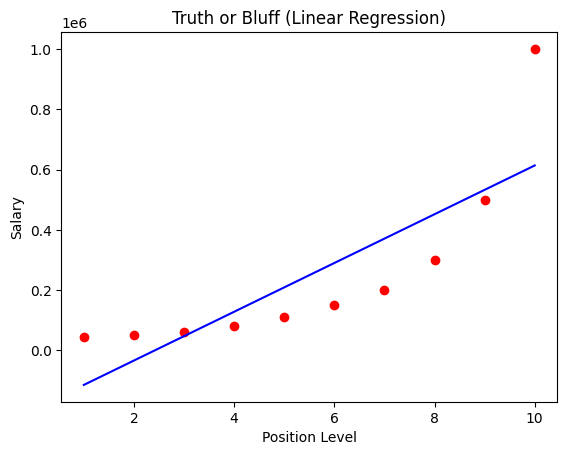

In [7]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

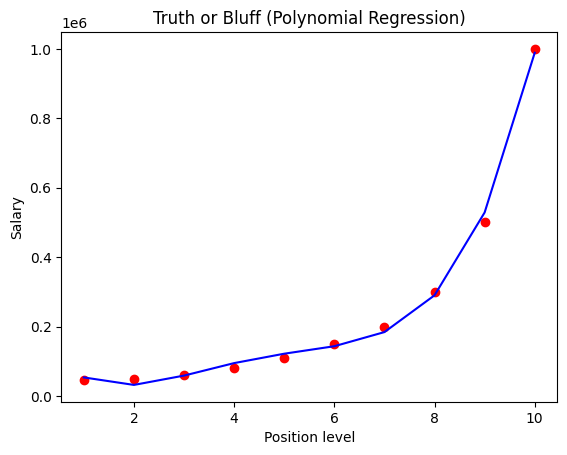

In [8]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\akshi\AppData\Local\Temp\ipykernel_11468\3621967135.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


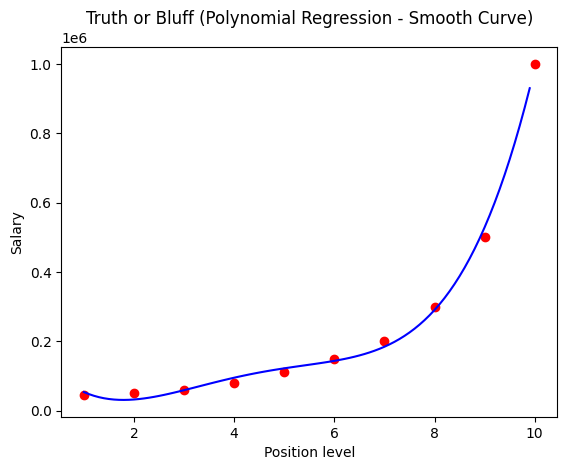

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [10]:
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)

Linear Regression Prediction for Level 6.5: [330378.78787879]


In [11]:
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)

Polynomial Regression Prediction for Level 6.5: [158862.4526515]


In [12]:
data=pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
data.shape

(205, 26)

In [14]:
X=data[["enginesize"]]
y=data['price']
print(X)

     enginesize
0           130
1           130
2           152
3           109
4           136
..          ...
200         141
201         141
202         173
203         145
204         141

[205 rows x 1 columns]


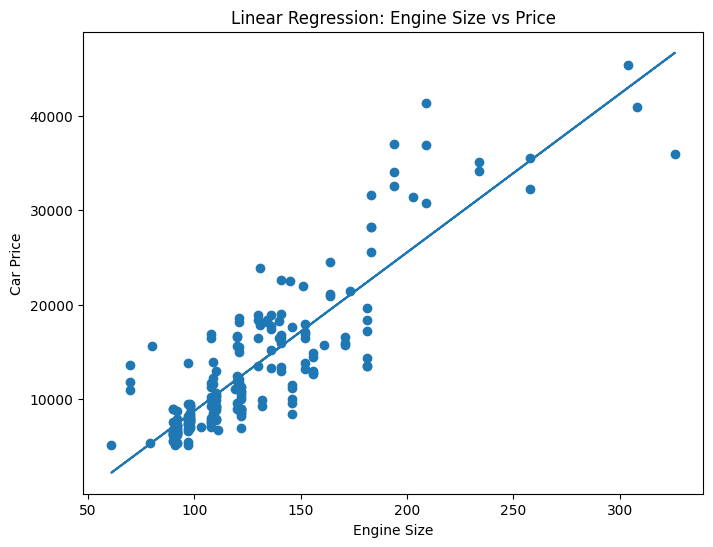

[25534.23774749]


C:\Users\akshi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear Regression: Engine Size vs Price")
plt.show()
x_value=[[200]]
pred_200=model.predict(x_value)
print(pred_200)


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial transformation
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


C:\Users\akshi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


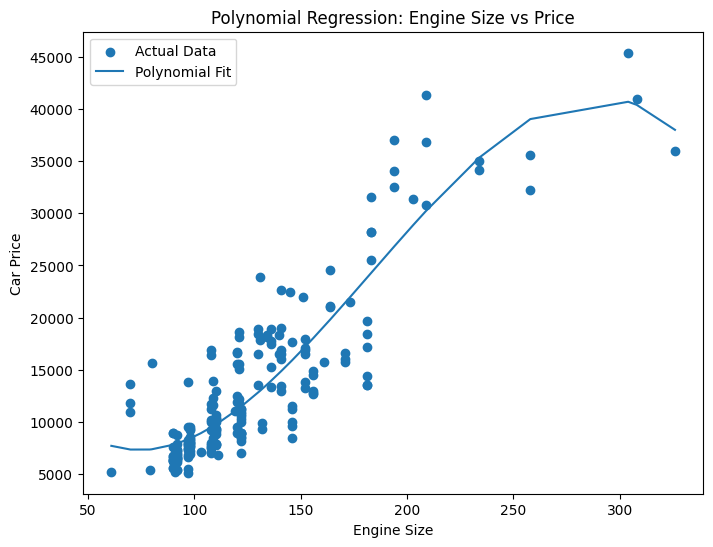

In [17]:
import numpy as np

# Sort values for smooth curve
X_sorted = np.sort(X.values, axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_pred_curve = model.predict(X_poly_sorted)

plt.figure(figsize=(8,6))
plt.scatter(X, y, label="Actual Data")
plt.plot(X_sorted, y_pred_curve, label="Polynomial Fit")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Polynomial Regression: Engine Size vs Price")
plt.legend()
plt.show()


In [18]:
engine_size = [[200]]
engine_size_poly = poly.transform(engine_size)

predicted_price = model.predict(engine_size_poly)
print("Predicted car price for engine size 200:", predicted_price[0])


Predicted car price for engine size 200: 28205.131887188483


C:\Users\akshi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.metrics import mean_squared_error, r2_score 
print("Linear Regression:")
print("MSE:", mean_squared_error(y, y_pred))
print("R2 :", r2_score(y, y_pred))

print("\nPolynomial Regression:")
print("MSE:", mean_squared_error(y, y_pred_curve))
print("R2 :", r2_score(y, y_pred_curve))


Linear Regression:
MSE: 14980261.40555132
R2 : 0.7641291357806176

Polynomial Regression:
MSE: 113015362.73924318
R2 : -0.7794770436712026


In [20]:
print("Linear model prediction for 200:",pred_200[0])
print("Polynomial  model prediction for 200:",predicted_price[0])


Linear model prediction for 200: 25534.23774748923
Polynomial  model prediction for 200: 28205.131887188483


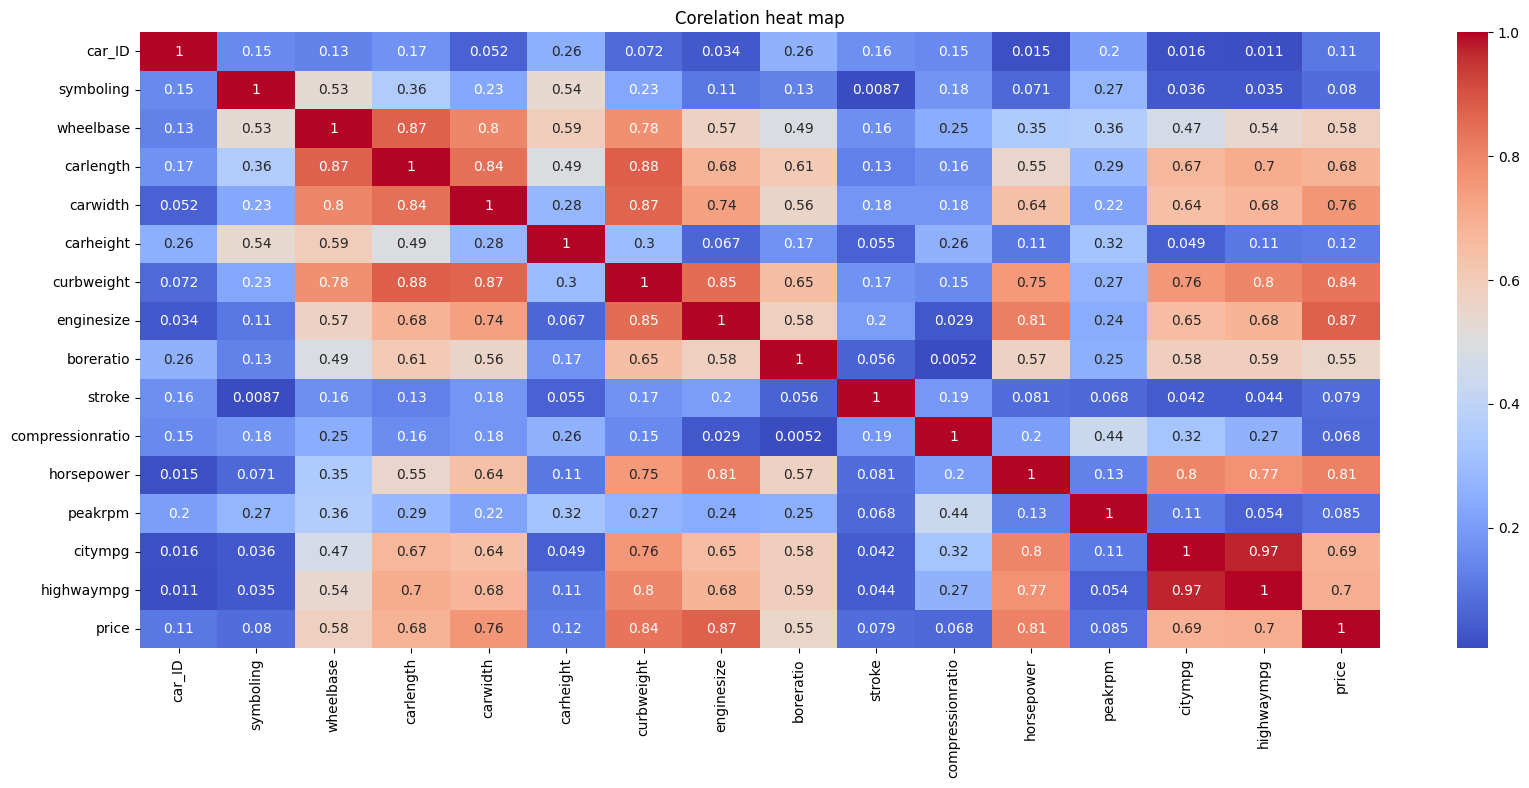

In [21]:
import seaborn as sns
numeric_data=data.select_dtypes(include=['int64','float64'])
corrre=np.abs(numeric_data.corr())
plt.figure(figsize=(20,8))
sns.heatmap(corrre,annot=True,cmap='coolwarm')
plt.title("Corelation heat map")
plt.show()


### the most price is effeccted by:
## enginsesize=>high positive(0.87)
## curbWeight=>high positive(0.84)
## HorsePower=>high positive(0.81)
## carwidth=>high positive(0.76)
## citympg=>moderate positive(0.69)
## carlength=>moderate postive(0.68)
## wheelbase=>moderate positive(0.58)
## bore ration=>moderate positive(0.55)
## low positive=>carId,symboling,carHeight,stroke,compressionRatio,Peakrpm


### near to 0=>carId,compressionRation,peakrpm,symboling,carHeight

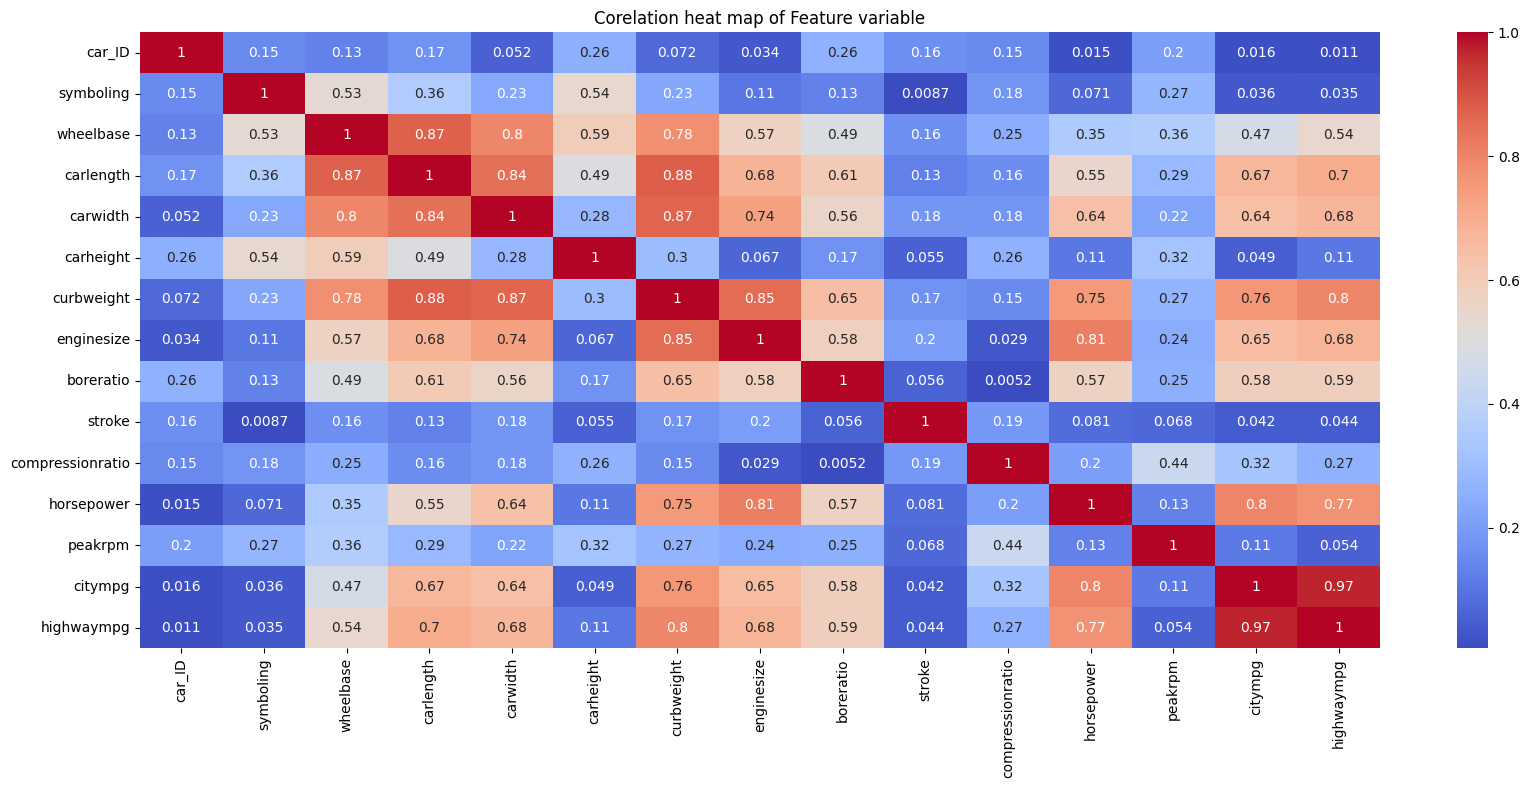

In [22]:
import seaborn as sns
dataset=data.drop(['price'],axis=1)
numeric_data=dataset.select_dtypes(include=['int64','float64'])
corrre=np.abs(numeric_data.corr())
plt.figure(figsize=(20,8))
sns.heatmap(corrre,annot=True,cmap='coolwarm')
plt.title("Corelation heat map of Feature variable")
plt.show()


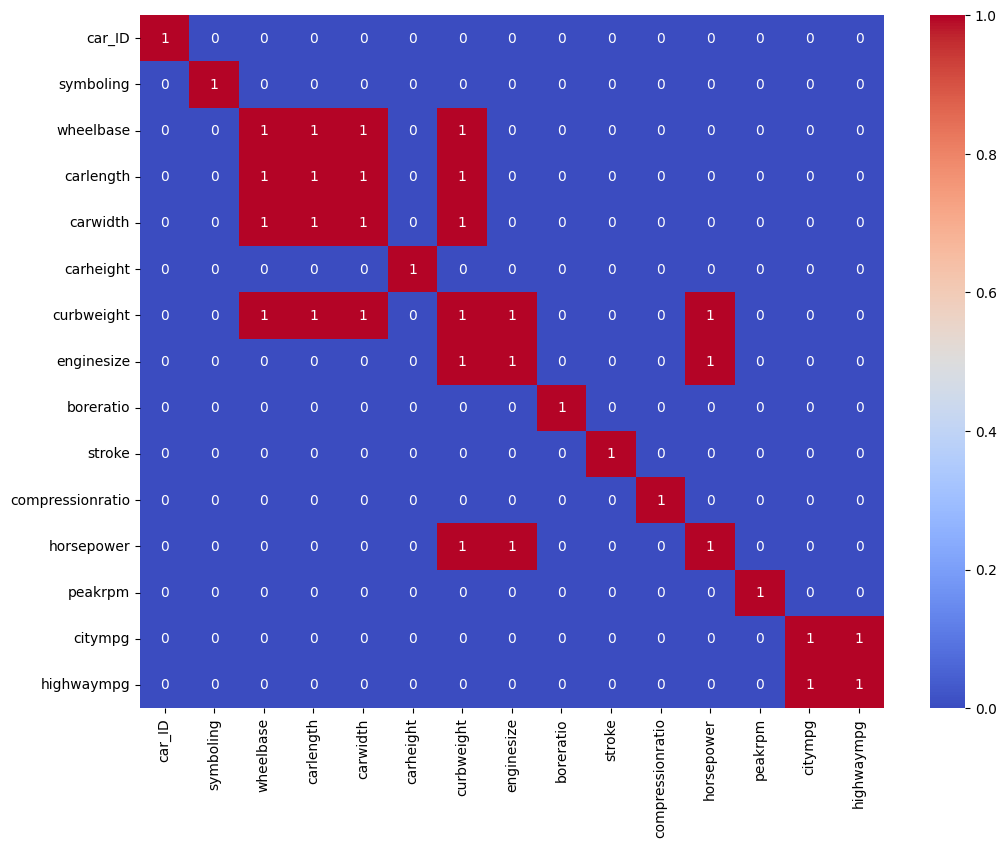

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

### wheelbase=>carlength
                carwidth
                curbweight
### carlength=>curbweight
                carwidth
                wheelBase
### carWidth=>curbWeight
                carLength
                wheelBase
### curbWeight=>horsePower
                engineSize
                carLength
                carWidth
                carHeight
### engineSize=>horsePower
                curbWeight
                carLength
                carWidth
                carHeight
### HorsePower=>curbWieght
                engineSize


In [24]:
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

target = 'price'

low_target_corr = corr['price'].abs() < 0.1
features_to_drop_1 = corr['price'][low_target_corr].index.tolist()
print(features_to_drop_1)

upper_triangle = corr.abs().where(
    np.triu(np.ones(corr.shape), k=1).astype(bool)
)

features_to_drop_2 = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > 0.75)
]

print(features_to_drop_2)
features_to_drop = list(set(features_to_drop_1).intersection(features_to_drop_2))

print("Features to drop:", features_to_drop)


['symboling', 'stroke', 'compressionratio', 'peakrpm']
['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']
Features to drop: []


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("CarPrice_Assignment.csv")

df_encoded = pd.get_dummies(
    df,
    columns=["drivewheel", "fueltype"],
    drop_first=True
)

df_encoded.drop(
    columns=[
        "CarName","aspiration","doornumber","carbody",
        "enginelocation","enginetype","cylindernumber",
        "fuelsystem","symboling","stroke","peakrpm",
        "citympg","highwaympg"
    ],
    inplace=True,
    errors="ignore"
)

target = "price"

X_before = df_encoded.drop(columns=[target])
y = df_encoded[target]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_before, y, test_size=0.3, random_state=42
)

scaler_b = StandardScaler()
Xb_train_scaled = scaler_b.fit_transform(Xb_train)
Xb_test_scaled = scaler_b.transform(Xb_test)

poly = PolynomialFeatures(degree=4, include_bias=False)
Xb_train_poly = poly.fit_transform(Xb_train_scaled)
Xb_test_poly = poly.transform(Xb_test_scaled)

lin_before = LinearRegression()
lin_before.fit(Xb_train_scaled, yb_train)

poly_before = LinearRegression()
poly_before.fit(Xb_train_poly, yb_train)

print("BEFORE")
print("Linear MSE:", mean_squared_error(yb_test, lin_before.predict(Xb_test_scaled)))
print("Polynomial MSE:", mean_squared_error(yb_test, poly_before.predict(Xb_test_poly)))
print("Linear R2 Train:", r2_score(yb_train, lin_before.predict(Xb_train_scaled)))
print("Linear R2 Test:", r2_score(yb_test, lin_before.predict(Xb_test_scaled)))
print("Polynomial R2 Train:", r2_score(yb_train, poly_before.predict(Xb_train_poly)))
print("Polynomial R2 Test:", r2_score(yb_test, poly_before.predict(Xb_test_poly)))

corr_all = df_encoded.corr(numeric_only=True)

high_thr = 0.75
low_thr = 0.45

highly_correlated_cols = set()
for i in range(len(corr_all.columns)):
    for j in range(i + 1, len(corr_all.columns)):
        if abs(corr_all.iloc[i, j]) > high_thr:
            highly_correlated_cols.add(corr_all.columns[i])
            highly_correlated_cols.add(corr_all.columns[j])

weakly_correlated_to_target = set(
    corr_all[target].abs()[corr_all[target].abs() < low_thr].index
)
weakly_correlated_to_target.discard(target)

common_cols = list(highly_correlated_cols & weakly_correlated_to_target)

X_after = df_encoded.drop(columns=common_cols + [target])

Xa_train, Xa_test, ya_train, ya_test = train_test_split(
    X_after, y, test_size=0.3, random_state=42
)

scaler_a = StandardScaler()
Xa_train_scaled = scaler_a.fit_transform(Xa_train)
Xa_test_scaled = scaler_a.transform(Xa_test)

Xa_train_poly = poly.fit_transform(Xa_train_scaled)
Xa_test_poly = poly.transform(Xa_test_scaled)

lin_after = LinearRegression()
lin_after.fit(Xa_train_scaled, ya_train)

poly_after = LinearRegression()
poly_after.fit(Xa_train_poly, ya_train)

print("\nAFTER")
print("Linear MSE:", mean_squared_error(ya_test, lin_after.predict(Xa_test_scaled)))
print("Polynomial MSE:", mean_squared_error(ya_test, poly_after.predict(Xa_test_poly)))
print("Linear R2 Train:", r2_score(ya_train, lin_after.predict(Xa_train_scaled)))
print("Linear R2 Test:", r2_score(ya_test, lin_after.predict(Xa_test_scaled)))
print("Polynomial R2 Train:", r2_score(ya_train, poly_after.predict(Xa_train_poly)))
print("Polynomial R2 Test:", r2_score(ya_test, poly_after.predict(Xa_test_poly)))

BEFORE
Linear MSE: 11534130.748483581
Polynomial MSE: 2786743715.2130246
Linear R2 Train: 0.8662023059841983
Linear R2 Test: 0.8335248005441998
Polynomial R2 Train: 1.0
Polynomial R2 Test: -39.221818699539114

AFTER
Linear MSE: 12048853.573087052
Polynomial MSE: 2541593559.8811703
Linear R2 Train: 0.863574787047182
Linear R2 Test: 0.8260956681059723
Polynomial R2 Train: 1.0
Polynomial R2 Test: -35.683500824058434


In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge, Lasso,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("CarPrice_Assignment.csv")

data = data.select_dtypes(include=[np.number])

X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0.01, 0.1, 1, 10, 100, 1000]

ridge_cv = LassoCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# ----------------------------
# 6. Predictions
# ----------------------------
y_pred = ridge_cv.predict(X_test_scaled)

print("Best alpha selected:", ridge_cv.alpha_)
# ----------------------------
# 5. Ridge Regression
# ----------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_pred = ridge.predict(X_test_scaled)

print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R² :", r2_score(y_test, ridge_pred))

# ----------------------------
# 6. Lasso Regression
# ----------------------------
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

lasso_pred = lasso.predict(X_test_scaled)

print("\nLasso Regression")
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R² :", r2_score(y_test, lasso_pred))

# ----------------------------
# 7. Lasso feature selection
# ----------------------------
lasso_coeff = pd.Series(lasso.coef_, index=X.columns)
print("\nFeatures selected by Lasso:")
print(lasso_coeff[lasso_coeff != 0])


Best alpha selected: 100.0
Ridge Regression
MSE: 11513355.805152413
R² : 0.8541579757800355

Lasso Regression
MSE: 11704151.371556992
R² : 0.8517411294593316

Features selected by Lasso:
car_ID              -760.293918
symboling            281.512462
wheelbase            677.885661
carlength           -626.275810
carwidth            1011.981115
carheight            622.280057
curbweight           332.853264
enginesize          4548.371829
boreratio            136.496331
stroke             -1032.481084
compressionratio    1377.090278
horsepower          1167.793512
peakrpm             1129.973348
citympg            -2347.094771
highwaympg          1297.570931
dtype: float64
